# Exploratory Data Analysis (EDA): Reviews Dataset

## 1. Introduzione
In questo notebook eseguiamo un'analisi esplorativa dettagliata sul dataset delle recensioni (reviews.csv). L'obiettivo è comprendere la struttura dei dati, identificare eventuali problemi (es. valori mancanti, outlier, duplicati) e ottenere insight preliminari utili per la fase successiva di sviluppo del sistema di raccomandazioni

In [ ]:
import pandas as pd

# Caricamento del dataset
reviews_df = pd.read_csv("../data/raw/reviews.csv")

# Prime righe del dataset
reviews_df.head()

## 2. Esplorazione Generale

### 2.1 Informazioni Generali

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154103 entries, 0 to 154102
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   _id     154103 non-null  object
 1   author  154103 non-null  object
 2   text    154103 non-null  object
 3   score   154103 non-null  int64 
 4   date    154103 non-null  object
 5   gameId  154103 non-null  object
 6   userId  154094 non-null  object
 7   _class  154103 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.4+ MB


### 2.2 Statistiche Descrittive

In [5]:
reviews_df.describe(include='all')

,_id,author,text,score,date,gameId,userId,_class
count,154103,154103,154103,154103.000000,154103,154103,154094,154103
unique,154103,10149,148952,NaN,9586,3044,10147,1
top,6807a1a65d04121deaabb144,Dimocracy,Sonic Frontiers is the best Sonic game in the ...,NaN,2023-09-07,6807a1905d04121deaab7e12,6807a1995d04121deaab926e,com.games.games_project.model.Review
freq,1,30,35,NaN,447,1170,30,154103
mean,NaN,NaN,NaN,71.033465,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,31.651104,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN


### 2.3 Valori Nulli

In [6]:
reviews_df.isnull().sum()

_id       0
author    0
text      0
score     0
date      0
gameId    0
userId    9
_class    0
dtype: int64

### 2.4 Cardinalità

In [7]:
reviews_df.nunique()

_id       154103
author     10149
text      148952
score         11
date        9586
gameId      3044
userId     10147
_class         1
dtype: int64

## 3. Pulizia e Preprocessing

In [8]:
# Conversione della colonna 'date' in formato datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Rimozione della colonna ridondante '_class'
if '_class' in reviews_df.columns:
    reviews_df.drop(columns=['_class'], inplace=True)

## 4. Distribuzione Punteggi Recensioni
 I punteggi sono fortemente concentrati verso l'alto, con una presenza marcata di recensioni da 100. Questo potrebbe indicare recensioni entusiaste o poco critiche.

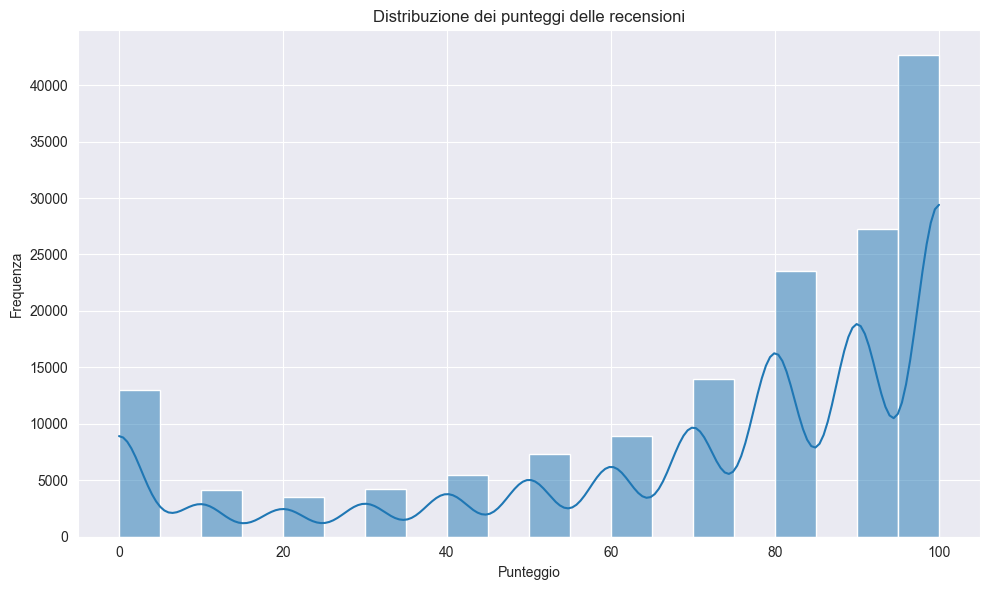

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['score'], bins=20, kde=True)
plt.title("Distribuzione dei punteggi delle recensioni")
plt.xlabel("Punteggio")
plt.ylabel("Frequenza")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Andamento Temporale dell Recensioni
La distribuzione delle recensioni nel tempo presenta diversi picchi che possono essere associati a rilasci importanti o trend di mercato.

C:\Users\franc\AppData\Local\Temp\ipykernel_34976\2724871983.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = reviews_df.set_index('date').resample('M').size()


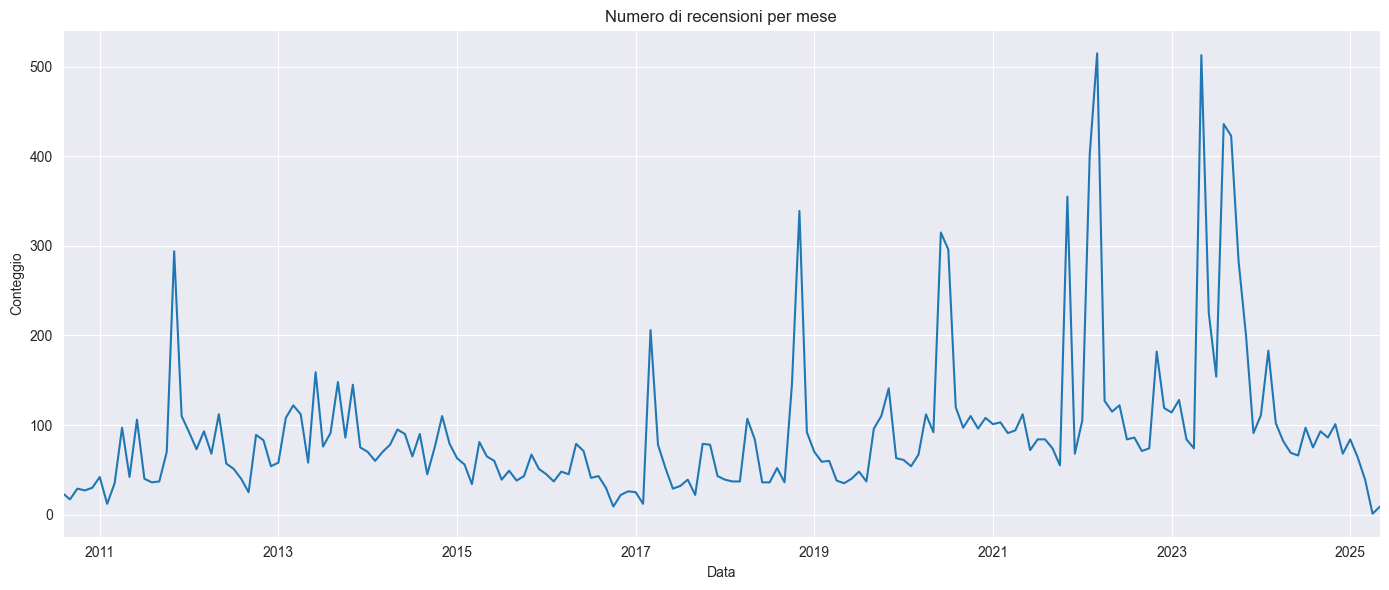

In [10]:
# Numero di recensioni per mese
monthly_reviews = reviews_df.set_index('date').resample('M').size()

plt.figure(figsize=(14, 6))
monthly_reviews.plot()
plt.title("Numero di recensioni per mese")
plt.ylabel("Conteggio")
plt.xlabel("Data")
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Utenti Più Attivi

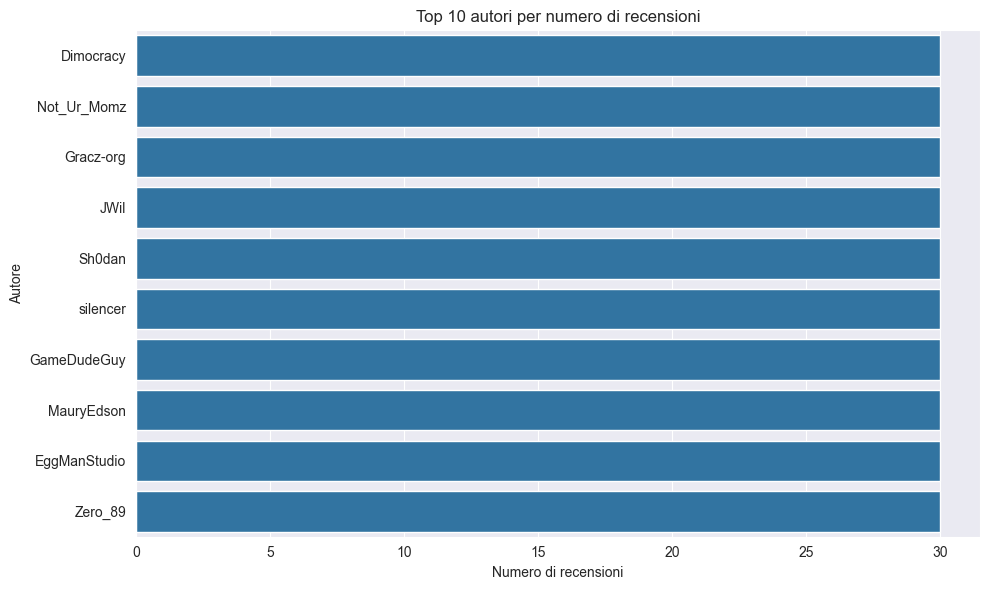

In [11]:
top_users = reviews_df['author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title("Top 10 autori per numero di recensioni")
plt.xlabel("Numero di recensioni")
plt.ylabel("Autore")
plt.tight_layout()
plt.show()

## 7. Giochi Più Recensiti

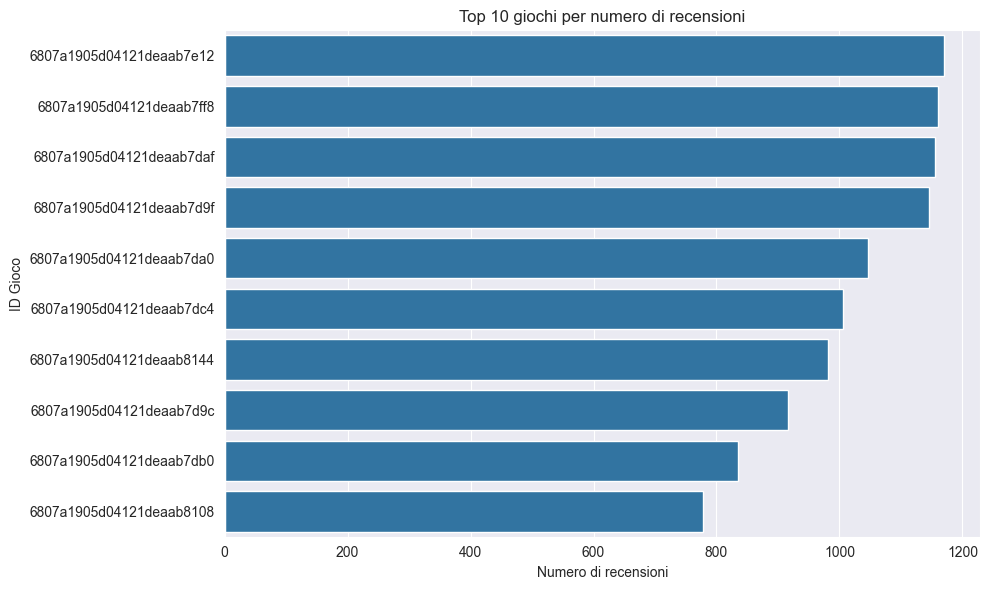

In [12]:
top_games = reviews_df['gameId'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_games.values, y=top_games.index)
plt.title("Top 10 giochi per numero di recensioni")
plt.xlabel("Numero di recensioni")
plt.ylabel("ID Gioco")
plt.tight_layout()
plt.show()

## 8. Lunghezza del Testo delle Recensioni

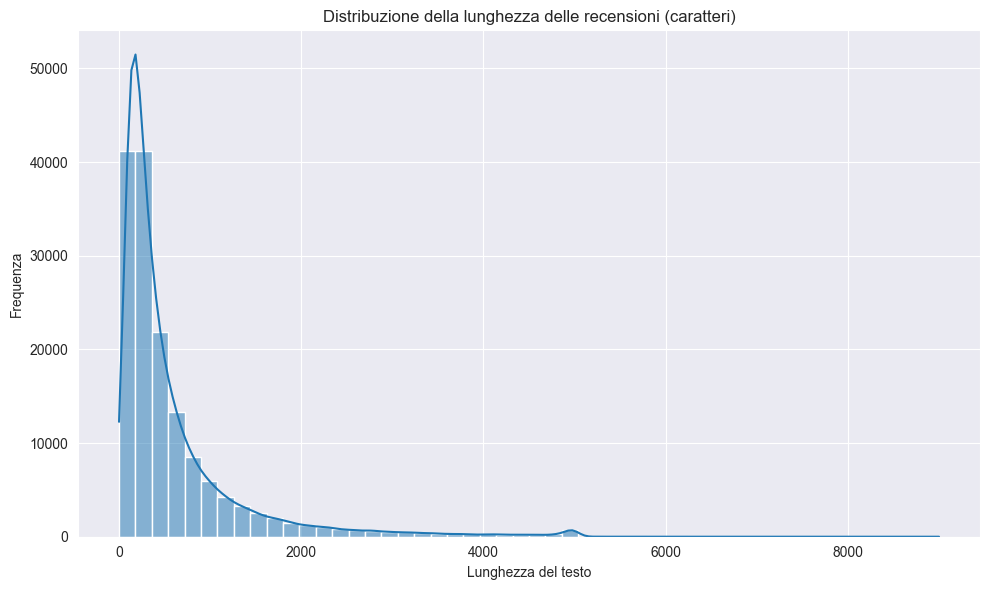

In [13]:
# Aggiunta colonna lunghezza testo
reviews_df["text_length"] = reviews_df["text"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(reviews_df["text_length"], bins=50, kde=True)
plt.title("Distribuzione della lunghezza delle recensioni (caratteri)")
plt.xlabel("Lunghezza del testo")
plt.ylabel("Frequenza")
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Lingua delle Recensioni

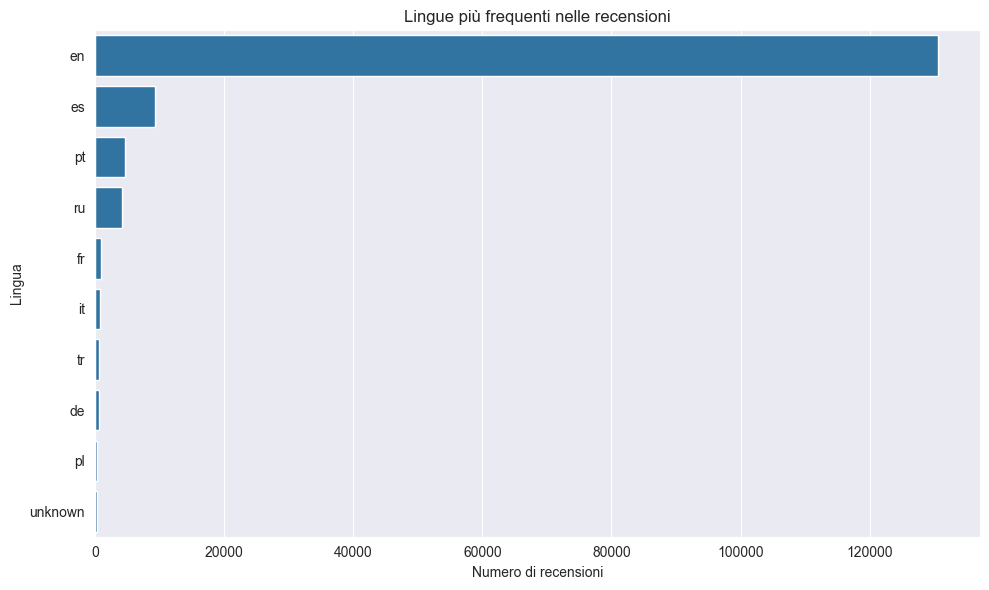

In [14]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Per risultati consistenti (random di default)
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Applichiamo la funzione a una nuova colonna
reviews_df["language"] = reviews_df["text"].apply(detect_language)

# Frequenza delle lingue più comuni
language_counts = reviews_df["language"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title("Lingue più frequenti nelle recensioni")
plt.xlabel("Numero di recensioni")
plt.ylabel("Lingua")
plt.tight_layout()
plt.show()


## 10. Conclusioni Preliminari
- Il dataset è generalmente pulito, salvo piccoli problemi come 9 userId mancanti.
- Molte recensioni hanno punteggio massimo, indicando possibile bias.
- Alcuni utenti e giochi dominano la distribuzione delle recensioni.
- La variabilità temporale mostra trend interessanti, forse legati al marketing o all'uscita di titoli importanti.